#### 수면 중 스트레스 정도 예측

#### feature
- sr(snoring_rate): 수면 중 코골이의 속도 또는 강도, 어떤 단위 또는 규모로 측정될 수 있습니다  
- rr(respiration_rate): 수면 중 분당 취해진 호흡의 수  
- t(body_temperature): 수면 중 사용자의 체온으로, 섭씨 또는 화씨로 측정될 수 있습니다  
- lm(limb_movement): 수면 중 사지 운동의 속도 또는 강도로, 그 사람이 얼마나 활동적이거나 불안정한지를 나타냅니다  
- bo(blood_oxygen): 수면 중 혈액에 존재하는 산소의 양을 나타내는 혈중 산소 농도입니다  
- rem(eye_movement): 수면 중 안구 운동 활동으로, 수면 중 급격한 안구 운동(REM) 단계를 나타낼 수 있습니다  
- sr.1(sleeping_hours): 특정 수면 시간 동안 잠을 잔 시간입니다  
- hr(heart_rate): 수면 중 분당 심장 박동 수, 전반적인 건강 및 수면의 질과 관련된 필수 생리학적 매개 변수  

#### target
- sl(stress_level): 수면 중 스트레스 정도를 나타내는 목표 변수로 다음과 같이 구분됩니다

In [1]:
import pandas as pd 

path = './datasets/stress_in_sleep.csv'
s_origin_df = pd.read_csv(path)
s_origin_df

s_df = s_origin_df.copy()
s_df

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


array([[<Axes: title={'center': 'sr'}>, <Axes: title={'center': 'rr'}>,
        <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'lm'}>, <Axes: title={'center': 'bo'}>,
        <Axes: title={'center': 'rem'}>],
       [<Axes: title={'center': 'sr.1'}>, <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'sl'}>]], dtype=object)

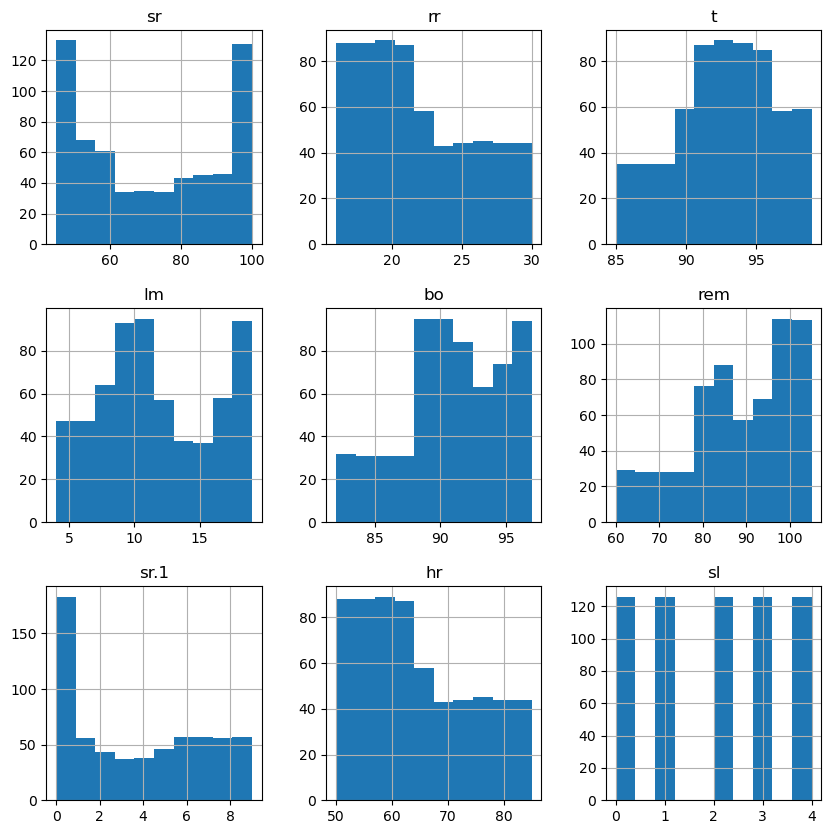

In [2]:
# 시각화
s_df.hist(figsize= (10,10))

Text(0.5, 1.0, 'Correlation')

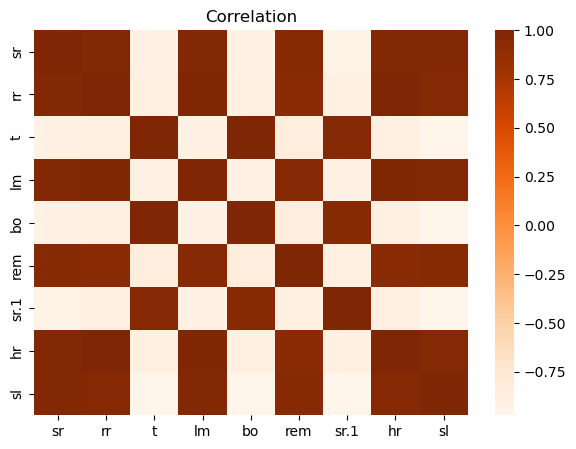

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = s_df.corr()
fig = plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(corr, cmap="Oranges")
heatmap.set_title("Correlation")

In [4]:
# sr log, 이상치제거
# 타겟 비중 맞추기
# 분석 시 standard scaler 적용할것

# 1. sr log
import numpy as np 
s_df['sr'] = np.log1p(s_df.sr)
s_df

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,4.551769,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,4.528721,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,4.110874,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,4.463146,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,3.894266,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,4.257030,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,3.900760,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,4.590097,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,4.088326,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [5]:
# 2. 결측치, 중복값
s_df.isna().sum()
s_df.duplicated().sum()

0

In [6]:
s_df.columns

Index(['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr', 'sl'], dtype='object')

In [7]:
# 표준화
from sklearn.preprocessing import StandardScaler

features = s_df.iloc[:, :-1]

std = StandardScaler()

std_features = std.fit_transform(features)
std_under_s_df = pd.DataFrame(std_features, columns=features.columns)
std_under_s_df['target'] = s_df.sl
std_under_s_df.shape

(630, 9)

In [8]:
# 이상치 제거

columns = ['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr']

for column in columns:
    print(f'{column}: {std_under_s_df[~std_under_s_df[column].between(-1.96, 1.96)].shape[0]}건')

sr: 0건
rr: 14건
t: 23건
lm: 0건
bo: 27건
rem: 33건
sr.1: 0건
hr: 14건


In [9]:
columns = ['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr']

for column in columns:
    std_under_s_df.drop(
        std_under_s_df[~std_under_s_df[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)
    
for column in columns:
    print(f'{column}: {std_under_s_df[~std_under_s_df[column].between(-1.96, 1.96)].shape[0]}건')

sr: 0건
rr: 0건
t: 0건
lm: 0건
bo: 0건
rem: 0건
sr.1: 0건
hr: 0건


In [10]:
s_df = s_df.iloc[std_under_s_df.index].reset_index(drop=True)
s_df

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,4.551769,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,4.528721,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,4.110874,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,4.463146,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,3.894266,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
551,4.257030,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
552,3.900760,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
553,4.590097,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
554,4.088326,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [11]:
# target 비중 확인
s_df.sl.value_counts()

sl
3    126
1    126
2    126
0     93
4     85
Name: count, dtype: int64

In [12]:
# 언더샘플링
sl0 = s_df[s_df['sl']==0].sample(85, random_state=321)
sl1 = s_df[s_df['sl']==1].sample(85, random_state=321)
sl2 = s_df[s_df['sl']==2].sample(85, random_state=321)
sl3 = s_df[s_df['sl']==3].sample(85, random_state=321)
sl4 = s_df[s_df['sl']==4]

s_df = pd.concat([sl0, sl1, sl2, sl3, sl4]).reset_index(drop=True)
s_df.sl.value_counts()

sl
0    85
1    85
2    85
3    85
4    85
Name: count, dtype: int64

In [46]:
# 앙상블을 사용한 결정트리 svc, knn 사용
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

features, targets = s_df.iloc[:, :-1], s_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
        train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=321)

dtc_parameters = {
    'max_depth': [2,3,4], 'min_samples_split':[10 ,30 , 50]
}

svc_parameters = {
    'svc__C': [0.01,0.1,1, 10, 100],
    'svc__gamma': [0.01,0.1,1, 10, 100],
    'svc__kernel': ['linear', 'rbf']
}

knn_parameters = {
    'knn__n_neighbors': [10,20, 30, 40, 50]
}

dtc = DecisionTreeClassifier()
svc = SVC(probability=True)
knn = KNeighborsClassifier()

g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=3, refit=True, return_train_score=True)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc',svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=3, refit=True, return_train_score=True)

knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn',knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_parameters, cv=3, refit=True, return_train_score=True)

In [47]:
# conda install -c conda-forge imbalanced-Learn
from imblearn.over_sampling import SMOTE

features , targets = s_df.iloc[:, :-1], s_df.sl

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size = 0.2, random_state=124)

smote = SMOTE(random_state=321)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

y_train_over.value_counts()


sl
0    68
3    68
2    68
1    68
4    68
Name: count, dtype: int64

In [48]:
g_dtc.fit(X_train_over, y_train_over)
dtc=g_dtc.best_estimator_
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
dtc_result_df

,params,mean_test_score,rank_test_score
0,"{'max_depth': 2, 'min_samples_split': 10}",0.652513,7
1,"{'max_depth': 2, 'min_samples_split': 30}",0.649589,9
2,"{'max_depth': 2, 'min_samples_split': 50}",0.652513,7
3,"{'max_depth': 3, 'min_samples_split': 10}",0.861357,4
4,"{'max_depth': 3, 'min_samples_split': 30}",0.849558,5
5,"{'max_depth': 3, 'min_samples_split': 50}",0.849558,5
6,"{'max_depth': 4, 'min_samples_split': 10}",0.982301,3
7,"{'max_depth': 4, 'min_samples_split': 30}",0.985277,2
8,"{'max_depth': 4, 'min_samples_split': 50}",0.988226,1


In [59]:
g_svc.fit(X_train_over, y_train_over)
svc=g_svc.best_estimator_
svc
svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(svc_result_df['params'][0])
svc_result_df

{'svc__C': 0.01, 'svc__gamma': 0.01, 'svc__kernel': 'linear'}

,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.01, 'svc__gamma': 0.01, 'svc__ker...",1.000000,1
1,"{'svc__C': 0.01, 'svc__gamma': 0.01, 'svc__ker...",0.323915,46
2,"{'svc__C': 0.01, 'svc__gamma': 0.1, 'svc__kern...",1.000000,1
3,"{'svc__C': 0.01, 'svc__gamma': 0.1, 'svc__kern...",0.323915,46
4,"{'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel...",1.000000,1
5,"{'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel...",0.323915,46
6,"{'svc__C': 0.01, 'svc__gamma': 10, 'svc__kerne...",1.000000,1
7,"{'svc__C': 0.01, 'svc__gamma': 10, 'svc__kerne...",0.323915,46
8,"{'svc__C': 0.01, 'svc__gamma': 100, 'svc__kern...",1.000000,1
9,"{'svc__C': 0.01, 'svc__gamma': 100, 'svc__kern...",0.323915,46


In [50]:
g_knn.fit(X_train_over, y_train_over)
knn= g_knn.best_estimator_
knn
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
knn_result_df


,params,mean_test_score,rank_test_score
0,{'knn__n_neighbors': 10},1.0,1
1,{'knn__n_neighbors': 20},1.0,1
2,{'knn__n_neighbors': 30},1.0,1
3,{'knn__n_neighbors': 40},1.0,1
4,{'knn__n_neighbors': 50},1.0,1


In [51]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators = [('dtc',dtc),
                               ('svc', svc),
                               ('knn', knn)],
                      voting='hard',
                      n_jobs =-1)
# Hard coding


# vc = VotingClassifier(estimators = [('dtc',dtc),
#                                ('svc', svc_pipe),
#                                ('knn', knn_pipe)],
#                       voting='soft',
#                       n_jobs =-1)

# Soft coding


In [52]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=4,
                                                     min_samples_split=50)),
                             ('svc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('svc',
                                               SVC(C=0.01, gamma=0.01,
                                                   kernel='linear',
                                                   probability=True))])),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=10))]))],
                 n_jobs=-1)

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction, average='macro')
#     재현율
    recall = recall_score(y_test , prediction, average='macro')
#     F1 score
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [54]:
prediction = vc.predict(X_test)

오차 행렬
[[17  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 17  0  0]
 [ 0  0  0 17  0]
 [ 0  0  0  0 17]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000, F1: 1.0000
################################################################################


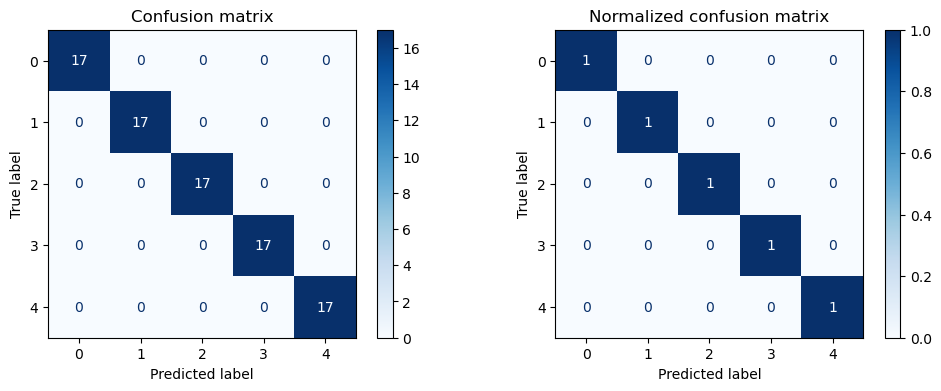

In [55]:
get_evaluation(y_test, prediction, vc, X_test)

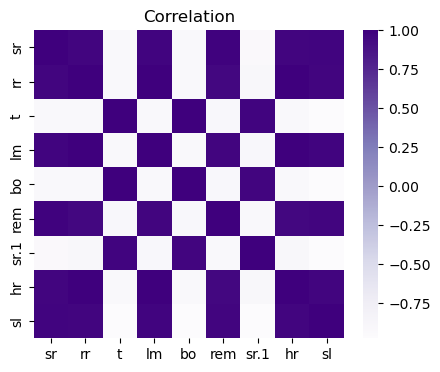

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (5,4))
corr = s_df.corr()
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

